In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn import linear_model
from sklearn.svm import SVR
from sklearn.metrics import mean_squared_error, r2_score

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [ ]:
import pandas as pd

URI_TREINO = "https://github.com/tgcsantos/quaretenadados/blob/master/DADOS_TREINO.csv?raw=true"
URI_TESTE = "https://github.com/tgcsantos/quaretenadados/raw/master/DADOS_TESTE.csv"
URI_DESAFIOQT = "https://github.com/tgcsantos/quaretenadados/raw/master/DESAFIOQT.csv"

dados_treino = pd.read_csv(URI_TREINO)
dados_teste = pd.read_csv(URI_TESTE)
dados_desafioqt = pd.read_csv(URI_DESAFIOQT)

erro_treino = "Erro ao carregar dados de treino"
erro_teste = "Erro ao carregar dados de teste"
erro_desafioqt = "Erro ao carregar dados de submissão"

assert dados_treino.shape == (150000, 5), erro_treino
assert dados_teste.shape == (20000, 5), erro_teste
assert dados_desafioqt.shape == (10000, 5), erro_desafioqt

In [ ]:
coluna_label = 'NU_NOTA_LC'
coluna_features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT', 'NU_NOTA_REDACAO']

# X_treino = dados_treino[coluna_features].to_numpy()
# Y_treino = dados_treino[coluna_label].to_numpy()
# X_teste = dados_teste[coluna_features].to_numpy()
# Y_teste = dados_teste[coluna_label].to_numpy()


#Testes

In [ ]:
#Minha avaliação nos dados de teste foi de 5219.286870186777

In [ ]:
#atribuir ao MODELO o nome do seu melhor modelo
from google.colab import files

#MODELO = modelo_dummy
#X_desafioqt = dados_desafioqt[coluna_features].to_numpy()
#predicao_desafioqt = MODELO.predict(X_desafioqt)


#desafio_df = pd.DataFrame(dados_desafioqt.ID)
#desafio_df[coluna_label] = predicao_desafioqt

#NÃO TROCAR O NOME DO ARQUIVO DE SAÍDA (PREDICAO_DESAFIO)
#desafio_df.to_csv('PREDICAO_DESAFIOQT.csv', index=False) 
#files.download('PREDICAO_DESAFIOQT.csv')


In [ ]:
#sns.pairplot(dados_treino)

In [ ]:
#descobrir os valores abaixo da linha de suporte em CH
dados_treino.query('NU_NOTA_CH < 394.5 and NU_NOTA_CH != 0')[['NU_NOTA_CH','NU_NOTA_LC']].sort_values(by='NU_NOTA_CH',ascending=False).head(20).index

Int64Index([17286, 91662, 55983, 91992], dtype='int64')

In [ ]:
#primeiro teste modelo regressao
regr = linear_model.LinearRegression()
regr.fit(X_treino, Y_treino)

#teste
y_= regr.predict(X_teste)
predicao = mean_squared_error(Y_teste, y_)
print(f"Minha avaliação nos dados de teste foi de {predicao}")

Minha avaliação nos dados de teste foi de 2177.3839304103562


In [ ]:
#segundo teste modelo regressao sem nota da redacao
#coluna_label = 'NU_NOTA_LC'
#coluna_features = ['NU_NOTA_CN', 'NU_NOTA_CH', 'NU_NOTA_MT']

#X_treino = dados_treino[coluna_features].to_numpy()
#Y_treino = dados_treino[coluna_label].to_numpy()
#X_teste = dados_teste[coluna_features].to_numpy()
#Y_teste = dados_teste[coluna_label].to_numpy()

#regr = linear_model.LinearRegression()
#regr.fit(X_treino, Y_treino)

#teste
#y_= regr.predict(X_teste)
#predicao = mean_squared_error(Y_teste, y_)
#print(f"Minha avaliação nos dados de teste foi de {predicao}")

In [ ]:
'''#terceiro teste sem zeros no treino.
dados_treino[coluna_features] = dados_treino[coluna_features].replace(0, np.nan)
dados_treino= dados_treino.dropna()
regr = linear_model.LinearRegression()
regr.fit(X_treino, Y_treino)

#teste
y_= regr.predict(X_teste)
predicao = mean_squared_error(Y_teste, y_)
print(f"Minha avaliação nos dados de teste foi de {predicao}")

não mudou nada'''

'#terceiro teste sem zeros no treino.\ndados_treino[coluna_features] = dados_treino[coluna_features].replace(0, np.nan)\ndados_treino= dados_treino.dropna()\nregr = linear_model.LinearRegression()\nregr.fit(X_treino, Y_treino)\n\n#teste\ny_= regr.predict(X_teste)\npredicao = mean_squared_error(Y_teste, y_)\nprint(f"Minha avaliação nos dados de teste foi de {predicao}")\n\nnão mudou nada'

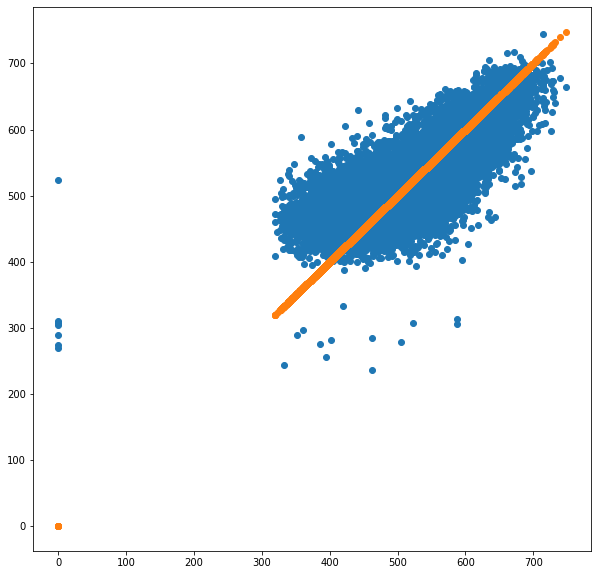

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x=Y_teste, y=y_)
plt.scatter(x=Y_teste, y=Y_teste)

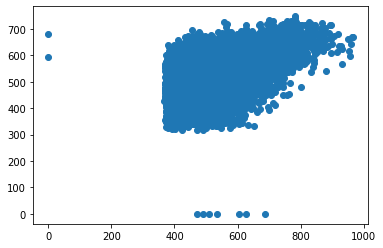

In [ ]:
plt.scatter(x=dados_teste['NU_NOTA_MT'].to_numpy(), y=Y_teste)

In [ ]:
#tentando entender as notas 0 em LC
lc_zero = dados_treino.query('NU_NOTA_LC == 0')
lc_zero.columns = ['CN', 'CH', 'LC', 'MT', 'RED']
lc_zero = lc_zero[['LC','CN', 'CH', 'MT', 'RED']]
#print(lc_zero)
print()
print('total de zeros em LC',len(lc_zero),', zeros em LC e CH', len(lc_zero.query('CH == 0')))


total de zeros em LC 59 , zeros em LC e CH 57


In [ ]:
lc_zero_test = dados_teste.query('NU_NOTA_LC ==0')
lc_zero_test.columns = ['CN', 'CH', 'LC', 'MT', 'RED']
lc_zero_test = lc_zero_test[['LC','CN', 'CH', 'MT', 'RED']]
print(len(lc_zero_test), len(lc_zero_test.query('CH == 0')))

7 6


In [ ]:
y_

array([536.78452136, 454.51854927, 652.30640267, ..., 528.04663791,
       552.39020775, 485.04872288])

In [ ]:
dados_predicao = pd.concat([dados_teste['NU_NOTA_CH'], pd.DataFrame(y_)], axis=1)
dados_predicao.query('NU_NOTA_CH==0')

,NU_NOTA_CH,0
53,0.0,310.829421
1049,0.0,288.432609
4607,0.0,282.162629
5540,0.0,312.732466
6921,0.0,275.528354
8582,0.0,305.597936
8659,0.0,296.565417
10177,0.0,284.368732
10759,0.0,273.334053
10783,0.0,277.985693


In [ ]:
dados_teste.query('NU_NOTA_CH==0')
#quem zera LC geralmente zera CH, mas quem zera CH geralmente não zera LC

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
53,495.5,0.0,0.0,687.1,400.0
1049,415.5,0.0,351.4,586.1,420.0
4607,437.2,0.0,401.3,520.3,380.0
5540,533.2,0.0,587.1,460.9,680.0
6921,451.8,0.0,385.6,448.7,360.0
8582,474.9,0.0,586.9,576.5,540.0
8659,515.9,0.0,360.9,481.6,460.0
10177,439.6,0.0,462.1,470.9,480.0
10759,423.1,0.0,0.0,472.2,360.0
10783,420.0,0.0,505.3,401.1,540.0


In [ ]:
# #modelo SVR https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
# clf = SVR(C=1.0, epsilon=0.2)
# clf.fit(X_treino, Y_treino)
# y_= clf.predict(X_teste)


In [ ]:
#predicao = mean_squared_error(Y_teste, y_)
#predicao

In [ ]:
#modelo SVR https://scikit-learn.org/stable/modules/generated/sklearn.svm.SVR.html
# clf = SVR(C=1.0, epsilon=0.1, degree=2)
# clf.fit(X_treino, Y_treino)
# y_= clf.predict(X_teste)

In [ ]:
predicao = mean_squared_error(Y_teste, y_)
predicao

2177.3839304103562

In [ ]:
# plt.figure(figsize=(10,10))
# plt.scatter(x=Y_teste, y=y_)
# plt.scatter(x=Y_teste, y=Y_teste)

In [ ]:
#tentando entender as notas zero
df = pd.DataFrame(Y_teste)

In [ ]:
df.columns = ['valor']

In [ ]:
df.query('valor==0').index

Int64Index([53, 2284, 10759, 11088, 17500, 18699, 19902], dtype='int64')

In [ ]:
df2 = pd.DataFrame(y_).query('index ==[53, 2284, 10759, 11088, 17500, 18699, 19902]')

In [ ]:
dados_teste.query('index ==[53, 2284, 10759, 11088, 17500, 18699, 19902]')

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
53,495.5,0.0,0.0,687.1,400.0
2284,530.8,476.5,0.0,535.6,900.0
10759,423.1,0.0,0.0,472.2,360.0
11088,454.4,0.0,0.0,625.6,0.0
17500,536.3,0.0,0.0,510.2,520.0
18699,453.1,0.0,0.0,604.2,520.0
19902,513.4,0.0,0.0,491.2,340.0


In [ ]:
dados_teste.query('NU_NOTA_CH ==0').sort_values(by='NU_NOTA_LC')

,NU_NOTA_CN,NU_NOTA_CH,NU_NOTA_LC,NU_NOTA_MT,NU_NOTA_REDACAO
53,495.5,0.0,0.0,687.1,400.0
18699,453.1,0.0,0.0,604.2,520.0
17500,536.3,0.0,0.0,510.2,520.0
11088,454.4,0.0,0.0,625.6,0.0
10759,423.1,0.0,0.0,472.2,360.0
19902,513.4,0.0,0.0,491.2,340.0
13301,433.1,0.0,332.9,421.4,0.0
1049,415.5,0.0,351.4,586.1,420.0
8659,515.9,0.0,360.9,481.6,460.0
6921,451.8,0.0,385.6,448.7,360.0


In [ ]:
#quanto seria o MSR se removesse os as notas zeros
mean_squared_error(pd.DataFrame(y_).query('index not in [53, 2284, 10759, 11088, 17500, 18699, 19902]').to_numpy(), pd.DataFrame(Y_teste).query('index not in [53, 2284, 10759, 11088, 17500, 18699, 19902]').to_numpy())

2138.69848701146

In [ ]:
#from sklearn.linear_model import Lasso
# Train model with default alpha=1
#lasso = Lasso(alpha=1).fit(X_treino, Y_treino)

In [ ]:
# y_= lasso.predict(X_teste)
# predicao = mean_squared_error(Y_teste, y_)
# print(f"Minha avaliação nos dados de teste foi de {predicao}")
# plt.figure(figsize=(10,10))
# plt.scatter(x=Y_teste, y=y_)
# plt.scatter(x=Y_teste, y=Y_teste)
# plt.show()

In [ ]:
# from sklearn.linear_model import Ridge
# # Train model with default alpha=1
# ridge = Ridge(alpha=1).fit(X_treino, Y_treino)

In [ ]:
# y_= ridge.predict(X_teste)
# predicao = mean_squared_error(Y_teste, y_)
# print(f"Minha avaliação nos dados de teste foi de {predicao}")
# plt.figure(figsize=(10,10))
# plt.scatter(x=Y_teste, y=y_)
# plt.scatter(x=Y_teste, y=Y_teste)
# plt.show()

In [ ]:
# # find optimal alpha with grid search
# from sklearn.model_selection import GridSearchCV
# alpha = [0.001, 0.01, 0.1, 1, 10, 100, 1000]
# param_grid = dict(alpha=alpha)
# grid = GridSearchCV(estimator=lasso, param_grid=param_grid, scoring='r2', verbose=1, n_jobs=-1)
# grid_result = grid.fit(X_treino, Y_treino)
# print('Best Score: ', grid_result.best_score_)
# print('Best Params: ', grid_result.best_params_)

In [ ]:

# # Train model with default alpha=0.001
# ridge = Ridge(alpha=0.001).fit(X_treino, Y_treino)

In [ ]:
# y_= ridge.predict(X_teste)
# predicao = mean_squared_error(Y_teste, y_)
# print(f"Minha avaliação nos dados de teste foi de {predicao}")
# plt.figure(figsize=(10,10))
# plt.scatter(x=Y_teste, y=y_)
# plt.scatter(x=Y_teste, y=Y_teste)
# plt.show()

In [ ]:
# from sklearn.linear_model import ElasticNet
# # Train model with default alpha=1 and l1_ratio=0.5
# elastic_net = ElasticNet(alpha=1, l1_ratio=0.5).fit(X_treino, Y_treino)

In [ ]:
# y_= elastic_net.predict(X_teste)
# predicao = mean_squared_error(Y_teste, y_)
# print(f"Minha avaliação nos dados de teste foi de {predicao}")
# plt.figure(figsize=(10,10))
# plt.scatter(x=Y_teste, y=y_)
# plt.scatter(x=Y_teste, y=Y_teste)
# plt.show()

In [ ]:
# clf = SVR(C=1.0, epsilon=0.1, degree=1)
# clf.fit(X_treino, Y_treino)
# y_= clf.predict(X_teste)

In [ ]:
# predicao = mean_squared_error(Y_teste, y_)
# print(f"Minha avaliação nos dados de teste foi de {predicao}")
# plt.figure(figsize=(10,10))
# plt.scatter(x=Y_teste, y=y_)
# plt.scatter(x=Y_teste, y=Y_teste)
# plt.show()

In [ ]:
# from sklearn import linear_model

# clf = linear_model.SGDRegressor(max_iter=200000,eta0=0.0000000001)
# clf.fit(X_treino, Y_treino)
# y_ = clf.predict(X_teste)
# predicao = mean_squared_error(Y_teste, y_)
# print(f"Minha avaliação nos dados de teste foi de {predicao}")

In [ ]:
plt.figure(figsize=(10,10))
plt.scatter(x=Y_teste, y=df)
plt.scatter(x=Y_teste, y=Y_teste)

In [ ]:
df = np.where(y_ <= 350, 380, y_)

In [ ]:
predicao = mean_squared_error(Y_teste, df)
print(f"Minha avaliação nos dados de teste foi de {predicao}")

In [ ]:
df.min()

#Auto ML

In [ ]:
#automl
!pip install h2o

     |████████████████████████████████| 129.6MB 80kB/s 
  Created wheel for h2o: filename=h2o-3.30.0.2-py2.py3-none-any.whl size=129672980 sha256=a6967327e88b0cf3c0ebb0543cd4a05ae0add812e30a86241b3578f45dd775ea
  Stored in directory: /root/.cache/pip/wheels/35/f0/d4/2090fb81ef10fd3dedffd1386a8a4d79b882e8e978fbee4e14
Successfully built h2o


In [ ]:
import h2o
from h2o.automl import H2OAutoML

h2o.init()


Checking whether there is an H2O instance running at http://localhost:54321 ..... not found.
Attempting to start a local H2O server...
  Java Version: openjdk version "11.0.6" 2020-01-14; OpenJDK Runtime Environment (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1); OpenJDK 64-Bit Server VM (build 11.0.6+10-post-Ubuntu-1ubuntu118.04.1, mixed mode, sharing)
  Starting server from /usr/local/lib/python3.6/dist-packages/h2o/backend/bin/h2o.jar
  Ice root: /tmp/tmp528z18ng
  JVM stdout: /tmp/tmp528z18ng/h2o_unknownUser_started_from_python.out
  JVM stderr: /tmp/tmp528z18ng/h2o_unknownUser_started_from_python.err
  Server is running at http://127.0.0.1:54321
Connecting to H2O server at http://127.0.0.1:54321 ... successful.


H2O_cluster_uptime:,02 secs
H2O_cluster_timezone:,Etc/UTC
H2O_data_parsing_timezone:,UTC
H2O_cluster_version:,3.30.0.2
H2O_cluster_version_age:,2 days
H2O_cluster_name:,H2O_from_python_unknownUser_pngrci
H2O_cluster_total_nodes:,1
H2O_cluster_free_memory:,3.180 Gb
H2O_cluster_total_cores:,2
H2O_cluster_allowed_cores:,2
H2O_cluster_status:,"accepting new members, healthy"


In [ ]:
# # Run AutoML for 20 base models (limited to 1 hour max runtime by default)
# aml = H2OAutoML(max_models=20, seed=1)
# aml.train(x=coluna_features, y=coluna_label, training_frame=dados_treino)

# # View the AutoML Leaderboard
# lb = aml.leaderboard
#lb.head(rows=lb.nrows)  # Print all rows instead of default (10 rows)

In [ ]:
dados_treino = h2o.import_file("https://github.com/tgcsantos/quaretenadados/blob/master/DADOS_TREINO.csv?raw=true")
dados_teste = h2o.import_file("https://github.com/tgcsantos/quaretenadados/raw/master/DADOS_TESTE.csv")
dados_desafioqt = h2o.import_file("https://github.com/tgcsantos/quaretenadados/raw/master/DESAFIOQT.csv")

X_treino = dados_treino[coluna_features]
Y_treino = dados_treino[coluna_label]
X_teste = dados_teste[coluna_features]
Y_teste = dados_teste[coluna_label]


Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%
Parse progress: |█████████████████████████████████████████████████████████| 100%


In [ ]:
yh2o = Y_teste.as_data_frame().to_numpy()
xh2o = X_teste.as_data_frame().to_numpy()

In [ ]:
automl = H2OAutoML(seed=42)
automl.train(x=coluna_features, y=coluna_label, training_frame=dados_treino)


AutoML progress: |████████████████████████████████████████████████████████| 100%


In [ ]:
automl.leaderboard

model_id,mean_residual_deviance,rmse,mse,mae,rmsle
StackedEnsemble_BestOfFamily_AutoML_20200501_021830,2016.21,44.9022,2016.21,34.6531,0.142773
StackedEnsemble_AllModels_AutoML_20200501_021830,2016.22,44.9024,2016.22,34.6532,0.142771
GBM_1_AutoML_20200501_021830,2016.49,44.9053,2016.49,34.6564,0.142737
GBM_2_AutoML_20200501_021830,2017.7,44.9188,2017.7,34.6624,0.143223
XGBoost_grid__1_AutoML_20200501_021830_model_6,2021.12,44.9569,2021.12,34.6989,0.143802
GBM_3_AutoML_20200501_021830,2022.41,44.9712,2022.41,34.7003,0.142941
XGBoost_grid__1_AutoML_20200501_021830_model_15,2025.9,45.01,2025.9,34.7292,0.14306
XGBoost_3_AutoML_20200501_021830,2027.98,45.0331,2027.98,34.742,0.142895
GBM_grid__1_AutoML_20200501_021830_model_12,2028.92,45.0435,2028.92,34.8145,0.144526
XGBoost_grid__1_AutoML_20200501_021830_model_7,2030.57,45.0619,2030.57,34.7448,0.142124


In [ ]:
pred2 = automl.leader.predict(dados_teste)

stackedensemble prediction progress: |████████████████████████████████████| 100%


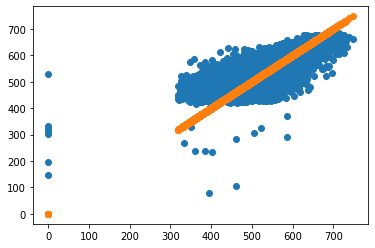

In [ ]:
pred2 = pred2.as_data_frame().to_numpy()
plt.scatter(yh2o,pred2)
plt.scatter(yh2o,yh2o)
plt.show()

In [ ]:
mean_squared_error(yh2o, pred2)

2052.6518574748407

In [ ]:
pred3 = np.where(pred2 <= 300, 300, pred2)

In [ ]:
mean_squared_error(yh2o, pred3)

2046.235434164444

In [ ]:
dados_desafioqt = h2o.import_file("https://github.com/tgcsantos/quaretenadados/raw/master/DESAFIOQT.csv")
predict_final = automl.leader.predict(dados_desafioqt)

Parse progress: |█████████████████████████████████████████████████████████| 100%
stackedensemble prediction progress: |████████████████████████████████████| 100%


In [ ]:
predict_final_array = predict_final.as_data_frame().to_numpy()

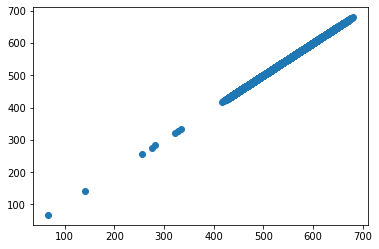

In [ ]:
plt.scatter(predict_final_array,predict_final_array)
plt.show()

In [ ]:
predict_final_ajustado = np.where(predict_final_array <= 300, 300, predict_final_array)

In [ ]:
#atribuir ao MODELO o nome do seu melhor modelo
from google.colab import files

dados_desafioqt = pd.read_csv(URI_DESAFIOQT)
desafio_df = pd.DataFrame(dados_desafioqt.ID)
desafio_df[coluna_label] = predict_final_ajustado

#NÃO TROCAR O NOME DO ARQUIVO DE SAÍDA (PREDICAO_DESAFIO)
desafio_df.to_csv('PREDICAO_DESAFIOQT.csv', index=False) 
files.download('PREDICAO_DESAFIOQT.csv')